<a href="https://colab.research.google.com/github/akrawat912/Deep-Learning/blob/master/mnist_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pickle
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
data=mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
# splitting to train and test set
(x_train, y_train), (x_test, y_test)=data

In [4]:
# out of 70k images of 0-9 digits, 60k for train and rest 10k for test.
# each image having size 28*28*1 px (grayscale channel)
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

(<matplotlib.image.AxesImage at 0x7ff25673c390>, 5)

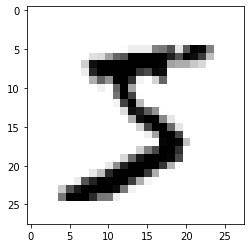

In [5]:
plt.imshow(x_train[0], cmap='binary'), y_train[0]

In [0]:
# changing target classes to category (10 classes of digit)
y_train=tf.keras.utils.to_categorical(y_train)
y_test=tf.keras.utils.to_categorical(y_test)

In [7]:
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [0]:
x_train=x_train.reshape(60000, 28, 28,1)
x_test=x_test.reshape(10000, 28, 28,1)

In [0]:
model=tf.keras.models.Sequential()
# first convolutional layer with filter size 3*3 with stride 1 (by default) 
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
# 2nd layer
model.add(tf.keras.layers.Conv2D(filters=32, activation='relu',kernel_size=3))
# Flattening transforms a two-dimensional matrix of features into a vector that can be fed into a fully connected layer.
model.add(tf.keras.layers.Flatten())
# output layer
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                184330    
Total params: 203,434
Trainable params: 203,434
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2085 - accuracy: 0.9553 - val_loss: 0.0828 - val_accuracy: 0.9751
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0639 - accuracy: 0.9808 - val_loss: 0.0767 - val_accuracy: 0.9778
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0451 - accuracy: 0.9856 - val_loss: 0.0800 - val_accuracy: 0.9780
